## Data Descriptions

### Kidney Disease Dataset

Predicting Chronic Kidney Disease based on health records.

Given 24 health related attributes taken in 2-month period of 400 patients, using the information of the 158 patients with complete records to predict the outcome (i.e. whether one has chronic kidney disease) of the remaining 242 patients (with missing values in their records).

**Problem Statement :** Classify whether the patients have "Classification" column 'ckd' or 'notckd'. This means whether the patient has kidney disorder or not.

In [1]:
# Importing the dataset and libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

%matplotlib inline

In [3]:
kidney_df = pd.read_csv('kidney_disease.csv')

In [4]:
kidney_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


** There are 26 columns **

In [5]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

## Performing feature engineering on the columns to remove all the categorical columns and object datatype columns

** There are a lot of object data types. We need to convert them to numeric before any further processing **

In [6]:
kidney_df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

** These columns have numerical values but have object dtype **

In [7]:
#These columns have \t? values

kidney_df.drop(kidney_df.index[[66,214,185, 133, 162]], inplace=True)

In [8]:
kidney_df[['pcv','wc','rc']] = kidney_df[['pcv','wc','rc']].apply(pd.to_numeric)

** These columns are categorical **

In [9]:
kidney_df[['htn','dm','cad','pe','ane']] = kidney_df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
kidney_df['dm'] = kidney_df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
kidney_df['cad'] = kidney_df['cad'].replace(to_replace='\tno',value=0)

kidney_df[['rbc','pc']] = kidney_df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
kidney_df[['pcc','ba']] = kidney_df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})

kidney_df[['appet']] = kidney_df[['appet']].replace(to_replace={'good':1,'poor':0})  #,'no':np.nan
kidney_df['classification'] = kidney_df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0})  #,'no':0.0
kidney_df.rename(columns={'classification':'class'},inplace=True)

In [10]:
kidney_df['pe'] = kidney_df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
kidney_df['appet'] = kidney_df['appet'].replace(to_replace='no',value=0)

# Dropping the index column
kidney_df.drop('id',axis=1,inplace=True)

In [11]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 399
Data columns (total 25 columns):
age      386 non-null float64
bp       384 non-null float64
sg       349 non-null float64
al       350 non-null float64
su       347 non-null float64
rbc      246 non-null float64
pc       331 non-null float64
pcc      391 non-null float64
ba       391 non-null float64
bgr      351 non-null float64
bu       376 non-null float64
sc       378 non-null float64
sod      309 non-null float64
pot      308 non-null float64
hemo     344 non-null float64
pcv      325 non-null float64
wc       291 non-null float64
rc       267 non-null float64
htn      393 non-null float64
dm       393 non-null object
cad      393 non-null float64
appet    394 non-null float64
pe       394 non-null float64
ane      394 non-null float64
class    395 non-null float64
dtypes: float64(24), object(1)
memory usage: 80.2+ KB


** Now we have converted all the object columns in float64 **

## Removing missing values from the data frame

In [12]:
kidney_df.isnull().sum()

age        9
bp        11
sg        46
al        45
su        48
rbc      149
pc        64
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       86
pot       87
hemo      51
pcv       70
wc       104
rc       128
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

Columns such as rbc, wc and rc have many missing values. Hence we remove these columns from the data frame.

In [13]:
kidney_df.drop(['rbc', 'wc', 'rc'], axis=1, inplace=True)

In [14]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 399
Data columns (total 22 columns):
age      386 non-null float64
bp       384 non-null float64
sg       349 non-null float64
al       350 non-null float64
su       347 non-null float64
pc       331 non-null float64
pcc      391 non-null float64
ba       391 non-null float64
bgr      351 non-null float64
bu       376 non-null float64
sc       378 non-null float64
sod      309 non-null float64
pot      308 non-null float64
hemo     344 non-null float64
pcv      325 non-null float64
htn      393 non-null float64
dm       393 non-null object
cad      393 non-null float64
appet    394 non-null float64
pe       394 non-null float64
ane      394 non-null float64
class    395 non-null float64
dtypes: float64(21), object(1)
memory usage: 71.0+ KB


We will fill the missing values in the columns with its respective mean values.

In [15]:
kidney_df = kidney_df.fillna(kidney_df.mean())

In [16]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 399
Data columns (total 22 columns):
age      395 non-null float64
bp       395 non-null float64
sg       395 non-null float64
al       395 non-null float64
su       395 non-null float64
pc       395 non-null float64
pcc      395 non-null float64
ba       395 non-null float64
bgr      395 non-null float64
bu       395 non-null float64
sc       395 non-null float64
sod      395 non-null float64
pot      395 non-null float64
hemo     395 non-null float64
pcv      395 non-null float64
htn      395 non-null float64
dm       395 non-null float64
cad      395 non-null float64
appet    395 non-null float64
pe       395 non-null float64
ane      395 non-null float64
class    395 non-null float64
dtypes: float64(22)
memory usage: 71.0 KB


##  Performing Descriptive Statistics on the dataset 

In [17]:
kidney_df.describe()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,class
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,51.455959,76.432292,1.017407,1.008571,0.455331,0.226586,0.107417,0.056266,148.031339,57.479255,...,4.628247,12.534012,38.898462,0.368957,0.340967,0.086514,0.791878,0.190355,0.152284,0.620253
std,16.845351,13.500540,0.005397,1.269492,1.034994,0.383697,0.308461,0.229556,75.138023,49.416675,...,2.837424,2.728991,8.195215,0.481909,0.473432,0.280765,0.405964,0.392581,0.359296,0.485939
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,...,2.500000,3.100000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000,27.000000,...,4.000000,10.850000,34.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,80.000000,1.017407,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,44.000000,...,4.628247,12.534012,38.898462,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.455331,0.226586,0.000000,0.000000,149.015670,62.500000,...,4.800000,14.700000,44.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,490.000000,391.000000,...,47.000000,17.800000,54.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observation : std is high for al, su, rbc, pc, pcc, ba, bgr etc . These fields do not have a normal distribution.

##  Performing EDA 

In [18]:
kidney_df.head()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,121.000000,36.0,...,4.628247,15.4,44.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,148.031339,18.0,...,4.628247,11.3,38.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,423.000000,53.0,...,4.628247,9.6,31.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,1.0,0.0,117.000000,56.0,...,2.500000,11.2,32.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,106.000000,26.0,...,4.628247,11.6,35.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [19]:
kidney_df.tail()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,class
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,140.0,49.0,...,4.9,15.7,47.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,75.0,31.0,...,3.5,16.5,54.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,100.0,26.0,...,4.4,15.8,49.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,114.0,50.0,...,4.9,14.2,51.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
399,58.0,80.0,1.025,0.0,0.0,0.0,0.0,0.0,131.0,18.0,...,3.5,15.8,53.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


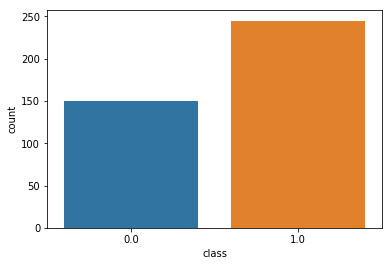

In [20]:
sns.countplot(x='class', data=kidney_df)

1 represents kidney disorder and 0 meaning no kidney problem. We have 150 healthy patients and 245 patients with kidney problem.

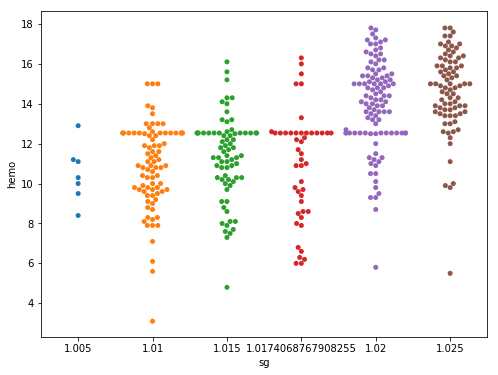

In [21]:
plt.subplots(figsize=(8,6))
sns.swarmplot(x='sg', y='hemo', data=kidney_df)
plt.show()

There are considerable no. of people whose sugar level lies between 1.02 - 1.025 whose hemo levels are above 12 units. Similarly considerable distribution can be seen with sg b/w 1.01-1.015 whose hemo levels are below 12 units.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1df537b8>,
      dtype=object)

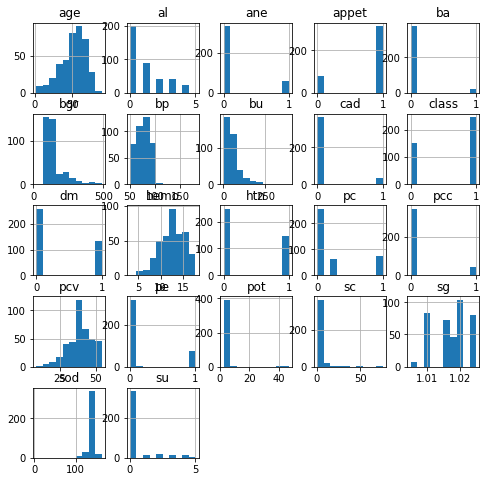

In [22]:
kidney_df.hist(bins=10, figsize=(8,8))

Most of the data do not have continuous distribution.

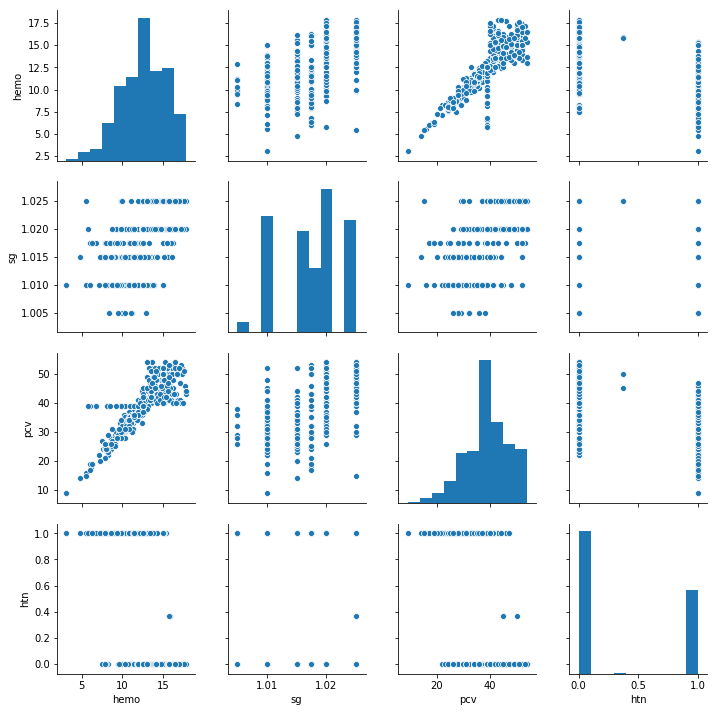

In [23]:
sns.pairplot(kidney_df, vars=['hemo','sg','pcv','htn'])

pcv and hemo have almost a linear relationship. As pcv increases hemo also increases. More people are in the hemo range of 10-15 units whose sg values varies between 1.010 and 1.025.

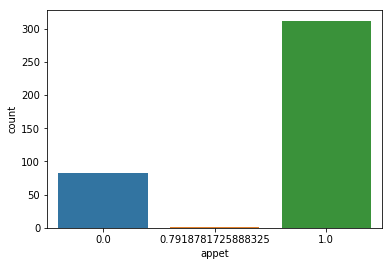

In [24]:
sns.countplot(x='appet', data=kidney_df)

Interesting thing to observe that people who are finacially well off are more sick compared to poor people. 0 means poor and 1 meaning good in the data set.

##  Performing classification using Random Forest and explaining the metrics

### Prepare the labels and features

In [25]:
x = kidney_df.drop('class', axis=1)
y = kidney_df['class']

### Split the data into training and testing set 

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)

### Create an instance of the random forest model

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', max_depth=3, n_estimators=10, random_state=88)

### Train the model

In [28]:
forest = forest.fit(x_train,y_train)

#### Feature importances of the model

In [29]:
list(zip(x.columns, forest.feature_importances_))

[('age', 0.0008126329686887777),
 ('bp', 0.0),
 ('sg', 0.14195724774415577),
 ('al', 0.14106409150325022),
 ('su', 0.03136382169350983),
 ('pc', 0.0),
 ('pcc', 0.0),
 ('ba', 0.0),
 ('bgr', 0.003447381844995996),
 ('bu', 0.05013676654287447),
 ('sc', 0.11693139968385786),
 ('sod', 0.03825458831506532),
 ('pot', 0.001449292577141427),
 ('hemo', 0.19572408617648795),
 ('pcv', 0.21538222611836919),
 ('htn', 0.06229626852411839),
 ('dm', 0.0),
 ('cad', 0.0),
 ('appet', 0.001180196307484812),
 ('pe', 0.0),
 ('ane', 0.0)]

Features like hemo, sg, sc seem to be having more impact on the model output in predicting the values.

### Predictions from the model 

In [30]:
pred = forest.predict(x_test)

### Model evaluation using metrics 

In [31]:
print("Accuracy score of the model", forest.score(x,y))

Accuracy score of the model 0.9822784810126582


In [32]:
from sklearn import metrics
forest_confusion_matrix = metrics.confusion_matrix(y_test,pred)
print(forest_confusion_matrix)

[[21  2]
 [ 1 55]]


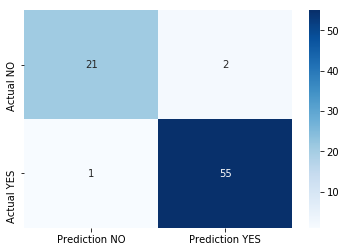

In [33]:
sns.heatmap(forest_confusion_matrix, cmap='Blues', xticklabels=['Prediction NO', 'Prediction YES'], yticklabels=['Actual NO', 'Actual YES'], annot=True, fmt='d')

In [34]:
classification_report_forest = metrics.classification_report(y_test,pred)
print(classification_report_forest)

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93        23
         1.0       0.96      0.98      0.97        56

   micro avg       0.96      0.96      0.96        79
   macro avg       0.96      0.95      0.95        79
weighted avg       0.96      0.96      0.96        79



This seems to be a very good model since the precison and the recall seems to be very good in predicting the kidney patient's condition.